In [ ]:
import pandas as pd 
import plotly.express as px
import numpy as np
import seaborn as sns
df_original = pd.read_csv("train.csv")
df = df_original
df

In [112]:
churn_avg_time_box = px.box(df,y = "avg_time_spent", x = "churn_risk_score")
churn_avg_time_box.show()

#average time spent on the website is about the same across all risk scores, variability varies more with those who have higher churn risk score. Negative avg time spent values. 

In [ ]:
df_simplified = df 
df_simplified = df_simplified.filter(items = ['complaint_status','churn_risk_score'])
df_simplified["count"] = df_simplified.groupby(["complaint_status","churn_risk_score"]).transform('size')

bc = px.histogram(df_simplified, x = "churn_risk_score", facet_col = "complaint_status",histnorm="percent")
bc.show()

#Whether or not a user's complaint_status was positive or negative, it doesn't affect whether or not the user's churn score was high 


In [ ]:
churn_avg_spend_box = px.box(df, y = "avg_transaction_value", x = "churn_risk_score")
churn_avg_spend_box.show()

#People who're spending more on the website have lower churn risk scores 

In [115]:
histogram_ages = px.histogram(df,x = "age", facet_col = "region_category", histnorm="percent")
histogram_ages.show()

#age is approximately uniformly distributed, region doesn't affect whose on the website 
#weird nan values to fix later 

In [ ]:
df_mod = df
df_mod["churn_risk_score"] = df_mod["churn_risk_score"].astype("string")
scatter_time_value = px.scatter(df,x = "avg_time_spent", y = "avg_transaction_value", color = "churn_risk_score", facet_col = "membership_category")
scatter_time_value.for_each_annotation(lambda a: a.update(text = a.text.split("=")[-1]))
scatter_time_value.show()

#Negative time, should look into that
#looks like people who're having high churn risk score also have lower tier memberships, those with the lower tier memberships seem to have their transaction value capped

In [ ]:
referral_churn_hist = px.histogram(df, x = "churn_risk_score", facet_col = "joined_through_referral", histnorm="percent")
referral_churn_hist
#Weird "?" category 
#Whether or not you joined through referral does not affect churn risk score 

In [ ]:

#Dropping "Missing" or "Error" average frequency login days
df["avg_frequency_login_days"] = df["avg_frequency_login_days"].astype("string")
df[df["avg_frequency_login_days"] == "Error"] = np.nan
df[df["avg_frequency_login_days"] == "Missing"] = np.nan
df.dropna(subset = ["avg_frequency_login_days"], inplace = True, axis = 0)
df["avg_frequency_login_days"] = df["avg_frequency_login_days"].astype("float")



# There still seems to be some negative frequency login days

#Absolute value-ing negative values 
df["avg_frequency_login_days"] = df["avg_frequency_login_days"].abs()
avg_freq_log_days_hist = px.histogram(df, x = "avg_frequency_login_days",nbins = 20, facet_col = "churn_risk_score",histnorm="percent")
avg_freq_log_days_hist.show()


In [119]:
spec_disc_hist = px.histogram(df,x = "churn_risk_score", facet_col = "used_special_discount",histnorm="percent")
spec_disc_hist.show()

#Whether or not a user used their special discount, it doesn't seem to affect churn_risk_score 

pref_hist = px.histogram(df,x = "churn_risk_score", facet_col = "offer_application_preference",histnorm="percent")
pref_hist.show()

past_comp_hist = px.histogram(df, x = "churn_risk_score", facet_col = "past_complaint",histnorm="percent")
past_comp_hist.show()

#whether or not the user received preferences and had past complaints seems to have some sort of relationship with churn risk score 

In [120]:
#Removing Duplicates 
df_bool_dupes = df[df.duplicated()]
df_bool_dupes

#No dupes 


Empty DataFrame
Columns: [customer_id, Name, age, gender, security_no, region_category, membership_category, joining_date, joined_through_referral, referral_id, preferred_offer_types, medium_of_operation, internet_option, last_visit_time, days_since_last_login, avg_time_spent, avg_transaction_value, avg_frequency_login_days, points_in_wallet, used_special_discount, offer_application_preference, past_complaint, complaint_status, feedback, churn_risk_score]
Index: []

[0 rows x 25 columns]

In [121]:
df_NaN = df
print(df_NaN.isnull().sum())

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64


In [122]:
#Very low number of preferred_offer_types that are NA, so will just delete the preferred_offer_types rows that have NA 
df.dropna(subset = ["preferred_offer_types"], inplace = True, axis = 0)

In [123]:
#Need to check if region_category doesn't have any sort of relationship with churn risk score 

#Seems that region_category does have some sort of relationship with region_category because when people are from villages they're less likely to have a high churn risk score
#Will change NA into a new category to keep region_category 
df["region_category"] = df["region_category"].astype("string")
df["region_category"] = df["region_category"].fillna("Other")

histogram_ages = px.histogram(df,x = "churn_risk_score", facet_col = "region_category", histnorm="percent")
histogram_ages.show()

In [124]:
#There are negative values as well as NA values for points_in_wallet
#Have to fix negative values first in points_in_wallet, seeing what happens when we change the NA Values to 0 

df["points_in_wallet"] = df["points_in_wallet"].abs()
    
#After 
histogram_points = px.histogram(df,x = "points_in_wallet")
histogram_points.show()

#Need to figure out how to deal with the NA values safe to say it is MCAR (missing completely at random) 
#There seems to be no reasonable solution to dealing with the NAs so the values will be deleted list-wise 
df.dropna(subset = ["points_in_wallet"], inplace = True, axis = 0)


In [125]:
#Need to fix avg_time_spent 

df["avg_time_spent"] = df["avg_time_spent"].abs()

#After 
ATS_hist = px.histogram(df, x = "avg_time_spent")
ATS_hist.show()


In [126]:
#this gives off weird errors and changes all dtypes of the data frame****


#Fixing join_through_referral "?" values to be more meaningful, moving them to "Missing"
#df["joined_through_referral"] = df["joined_through_referral"].astype("string")
#df[df["joined_through_referral"] == "?"] = "Missing"


In [ ]:
#this gives off weird errors and changes all dtypes of the data frame****

#Fixing churn risk score "-1" values into "Missing"
#df["churn_risk_score"] = df["churn_risk_score"].astype("string")
#df[df["churn_risk_score"] == "-1"] = "Missing"

In [127]:
df

#Figure out outliers 
#Need to check outliers in avg_time_spent, avg_transaction_value, avg_frequency_login_days, and points_in_wallet 
#Plot correlation matrix 
#plot a pairplot 


customer_id              Name   age gender  \
0          fffe4300490044003600300030003800   Pattie Morrisey  18.0      F   
2          fffe4300490044003100390032003600   Merideth Mcmeen  44.0      F   
3      fffe43004900440036003000330031003600  Eufemia Cardwell  37.0      M   
4      fffe43004900440031003900350030003600      Meghan Kosak  31.0      F   
5      fffe43004900440036003300320035003300    Leslie Browder  13.0      M   
...                                     ...               ...   ...    ...   
36985      fffe4300490044003800310034003500        Dwain Cann  12.0      F   
36986  fffe43004900440034003900300036003500  Marlena Chastain  27.0      M   
36987  fffe43004900440035003500390036003100          Cuc Tarr  46.0      F   
36988  fffe43004900440033003500380036003600    Jenni Stronach  29.0      F   
36990  fffe43004900440031003200390039003000     Tawana Ardoin  53.0      M   

      security_no region_category  membership_category joining_date  \
0         XW0DQ7H         Village  Platinum Membership   2017-08-17   
2         1F2TCL3            Town        No Membership   2016-11-11   
3         VJGJ33N            City        No Membership   2016-10-29   
4         SVZXCWB            City        No Membership   2017-09-12   
5         PSG1LGF            City      Gold Membership   2016-01-08   
...           ...             ...                  ...          ...   
36985     GWAHGJY         Village   Premium Membership   2016-10-25   
36986     8X0LUUS            Town  Platinum Membership   2015-09-07   
36987     6F51HFO           Other     Basic Membership   2017-09-21   
36988     21KSM8Y            Town     Basic Membership   2016-06-27   
36990     K6VTP1Z         Village  Platinum Membership   2017-06-15   

      joined_through_referral referral_id  ... avg_time_spent  \
0                          No    xxxxxxxx  ...     300.630000   
2                         Yes    CID12313  ...     516.160000   
3                         Yes     CID3793  ...      53.270000   
4                          No    xxxxxxxx  ...     113.130000   
5                          No    xxxxxxxx  ...     433.620000   
...                       ...         ...  ...            ...   
36985                      No    xxxxxxxx  ...     418.380000   
36986                     Yes    CID15800  ...     135.830000   
36987                      No    xxxxxxxx  ...     650.682759   
36988                      No    xxxxxxxx  ...     638.123421   
36990                      No    xxxxxxxx  ...     482.610000   

      avg_transaction_value avg_frequency_login_days points_in_wallet  \
0                  53005.25                     17.0       781.750000   
2                  21027.00                     22.0       500.690000   
3                  25239.56                      6.0       567.660000   
4                  24483.66                     16.0       663.060000   
5                  13884.77                     24.0       722.270000   
...                     ...                      ...              ...   
36985              56397.21                      7.0       725.890000   
36986               8225.68                     16.0       748.570000   
36987              27277.68                      6.0       639.510000   
36988              11069.71                     28.0       527.990000   
36990               2378.86                     20.0       197.264414   

       used_special_discount  offer_application_preference  past_complaint  \
0                        Yes                           Yes              No   
2                         No                           Yes             Yes   
3                         No                           Yes             Yes   
4                         No                           Yes             Yes   
5                        Yes                            No             Yes   
...                      ...                           ...             ...   
36985                    Yes          

In [128]:
avg_TS = px.box(df, x = "avg_time_spent")
avg_TS.show()

avg_TV = px.box(df,x = "avg_transaction_value")
avg_TV.show()

avg_FLD = px.box(df,x = "avg_frequency_login_days")
avg_FLD.show()

PIW = px.box(df,x = "points_in_wallet")
PIW.show()

#Using IQR/Z-Scores to determine outliers in continuous variables above 

In [129]:
#Trying to fix avg_time_spent by replacing avg_time_spent with the median imputation (clipping outliers to median)

median_ATS = np.percentile(df["avg_time_spent"],50)
q3_ATS = np.percentile(df["avg_time_spent"],75)
q1_ATS = np.percentile(df["avg_time_spent"],25)

lower_ATS = q1_ATS-(1.5*(q3_ATS-q1_ATS))
upper_ATS = q3_ATS+(1.5*(q3_ATS-q1_ATS))

df["avg_time_spent"]=np.where(df["avg_time_spent"]>upper_ATS,median_ATS,np.where(df["avg_time_spent"]<lower_ATS,median_ATS,df["avg_time_spent"]))

avg_TS = px.box(df, x = "avg_time_spent")
avg_TS.show()

In [130]:
#Clipping outliers to median if they're past the bounds 

median_TV = np.percentile(df["avg_transaction_value"],50)
q3_TV = np.percentile(df["avg_transaction_value"],75)
q1_TV = np.percentile(df["avg_transaction_value"],25)

lower_TV = q1_TV-(1.5*(q3_TV-q1_TV))
upper_TV = q3_TV+(1.5*(q3_TV-q1_TV))

df["avg_transaction_value"]=np.where(df["avg_transaction_value"]>upper_TV,median_TV,np.where(df["avg_transaction_value"]<lower_TV,upper_TV,df["avg_transaction_value"]))

avg_TV = px.box(df,x = "avg_transaction_value")
avg_TV.show()


In [131]:
#Clipping significant values with a z-score greater than |3| 
from scipy import stats 

z_scores_FLD = np.abs(stats.zscore(df["avg_frequency_login_days"]))
thres = 3

df.loc[z_scores_FLD > thres,"avg_frequency_login_days"] = df["avg_frequency_login_days"].median()

avg_FLD = px.box(df,x = "avg_frequency_login_days")
avg_FLD.show()

In [132]:
#Clipping significant values with a z-score greater than |3| 

z_scores_PIW = np.abs(stats.zscore(df["points_in_wallet"]))
thres = 3

df.loc[z_scores_PIW > thres,"points_in_wallet"] = df["points_in_wallet"].median()

avg_FLD = px.box(df,x = "points_in_wallet")
avg_FLD.show()

<Axes: >

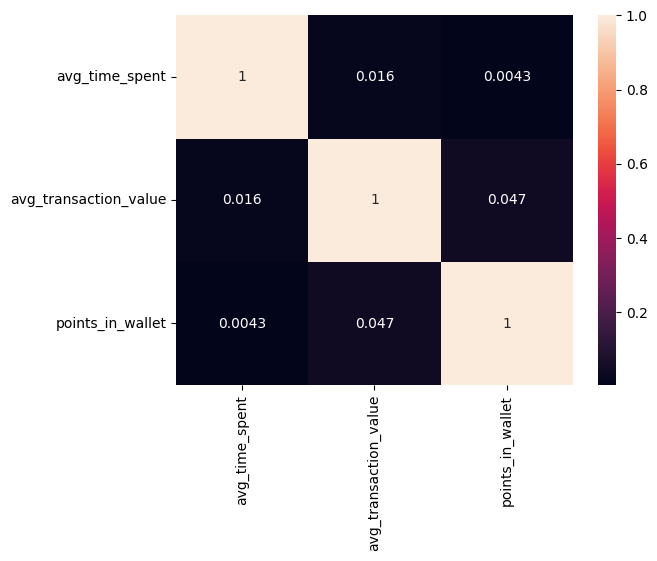

In [133]:
'''
continuous variables in the dataframe^^

avg_time_spent           
avg_transaction_value    
points_in_wallet         
'''

df_only_conts = pd.DataFrame()
df_only_conts.loc[:,"avg_time_spent"] = df.loc[:,"avg_time_spent"]
df_only_conts.loc[:,"avg_transaction_value"] = df.loc[:,"avg_transaction_value"]
df_only_conts.loc[:,"points_in_wallet"] = df.loc[:,"points_in_wallet"]


sns.heatmap(df_only_conts.corr(),annot=True)

#No correlation among the continuous variables 

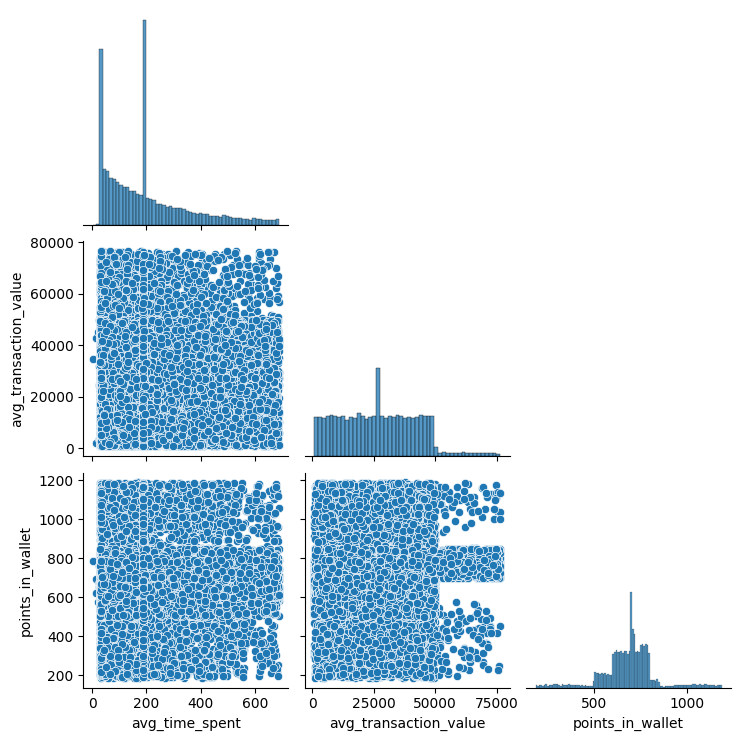

In [134]:
sns.pairplot(df_only_conts, corner = True)
#seems like a lot of users have around 650-700 points, they may be given these if they're a certain membership or a gift for signing up

In [ ]:
#going back to see if any of the variables share a relationship with churn risk score 

#cont variables 


#ATS_ATV_CRS_scatter = px.scatter(df,x = "avg_time_spent", y = "avg_transaction_value", facet_col = "churn_risk_score")
#ATS_ATV_CRS_scatter.show()

#ATS_PIW_CRS_scatter = px.scatter(df, x = "avg_time_spent", y = "points_in_wallet", facet_col = "churn_risk_score")
#ATS_PIW_CRS_scatter.show()

#ATV_PIW_CRS_scatter = px.scatter(df,x = "avg_transaction_value", y = "points_in_wallet", facet_col = "churn_risk_score")
#ATV_PIW_CRS_scatter.show()


#Key Takeaways 
#Seems like users are capped with their transaction value when their churn risk score is higher 
#Seems like users are given a base number of points in wallet, they could be getting these points rewards from the site but it seems like if they let the rewards sit they're likely to have left

In [ ]:
#going back to see if any of the variables share a relationship with churn risk score 

#disc variables 

#MC_CRS_hist = px.histogram(df, x = "membership_category", facet_col = "churn_risk_score", histnorm="percent")
#MC_CRS_hist.show()
#membership category and churn risk score are related 

#RC_CRS_hist = px.histogram(df, x = "region_category", facet_col = "churn_risk_score", histnorm="percent")
#RC_CRS_hist
#region category and churn risk score are related 

#JTR_CRS_hist = px.histogram(df, x = "joined_through_referral", facet_col = "churn_risk_score", histnorm="percent")
#JTR_CRS_hist.show()
#joining through referrals and churn risk score are related 

#OAP_CRS_hist = px.histogram(df, x = "offer_application_preference", facet_col = "churn_risk_score", histnorm = "percent")
#OAP_CRS_hist.show()
#preferred offers and churn risk score are related 

#PC_CRS_hist = px.histogram(df, x = "past_complaint", facet_col = "churn_risk_score", histnorm="percent")
#PC_CRS_hist.show()
#Past complaints and churn risk score are related 

#CS_CRS_hist = px.histogram(df, x = "complaint_status", facet_col = "churn_risk_score", histnorm="percent")
#CS_CRS_hist.show()
#Complaint status and churn risk score are related 

#F_CRS_hist = px.histogram(df, x = "feedback", facet_col = "churn_risk_score", histnorm="percent")
#F_CRS_hist.show() 
#feedback and churn risk score are related 

#avg_freq_log_days_hist = px.histogram(df, x = "avg_frequency_login_days", facet_col = "churn_risk_score", nbins= 20, histnorm = "percent")
#avg_freq_log_days_hist.show()


In [ ]:
#Key Takeaways 
'''
Variables that share a relationship with churn risk score:

***DISCRETE***
- membership_category
- region_category
- joined_through_referral
- offer_application_preference
- past_complaint
- complaint_status 
- feedback 
- avg_frequency_login_days

***CONTINUOUS***
- avg_time_spent           
- avg_transaction_value    
- points_in_wallet         
'''

In [ ]:
'''
Questions to ask:
- Help with debugging changing "Missing"
- Should we treat churn risk score as a discrete variable 
- should we treat frequency_login_days as a discrete variable 
- is it okay to absolute value the negative values in the continuous variables + frequency_login_days
- is it okay to drop the NA preferred_offer_types rows
'''

In [ ]:
#link to check dependence of categorical-categorical and categorical-continuous variables 
#https://datascientest.com/en/calculate-correlation-between-two-variables-how-do-you-measure-dependence#:~:text=To%20find%20out%20whether%20two,for%20deciding%20between%20two%20hypotheses.